# EDA -- Amazon Review Cleaned Dataset

In [134]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
sns.set_style('darkgrid')

In [135]:
df = pd.read_csv('data_clean.csv')

In [136]:
df.head(1)

,asin,categories,reviewText,reviewTime,reviewerID,reviewerName,summary,title,unixReviewTime,rating,help,rev_len,reviewerID_code,asin_code
0,B00004WA57,"[[""Sports & Outdoors"",""Outdoor Gear"",""Camping ...",I have own an E-Z out for over 16yrs and have ...,"08 1, 2013",A2FLKB2RU011W5,Amazon Customer,E-Z Out,GERBER E-Z Out Skeleton - Serrated Edge - Mode...,2013-07-31T17:00:00.000-07:00,5,1,522,35934,14


In [137]:
df.describe()

,rating,help,rev_len,reviewerID_code,asin_code
count,98545.000000,98545.000000,98545.000000,98545.000000,98545.000000
mean,4.159257,0.398143,351.947445,47281.972845,5556.903780
std,1.247146,0.489518,427.099073,27276.762944,4047.376934
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,136.000000,23669.000000,1879.000000
50%,5.000000,0.000000,216.000000,47263.000000,5037.000000
75%,5.000000,1.000000,399.000000,70910.000000,8759.000000
max,5.000000,1.000000,21514.000000,94517.000000,14132.000000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98545 entries, 0 to 98544
Data columns (total 14 columns):
asin               98545 non-null object
categories         98545 non-null object
reviewText         98501 non-null object
reviewTime         98545 non-null object
reviewerID         98545 non-null object
reviewerName       98542 non-null object
summary            98545 non-null object
title              98545 non-null object
unixReviewTime     98545 non-null object
rating             98545 non-null int64
help               98545 non-null int64
rev_len            98545 non-null int64
reviewerID_code    98545 non-null int64
asin_code          98545 non-null int64
dtypes: int64(5), object(9)
memory usage: 10.5+ MB


### Let's see what is the quality of the products in the sports & outdoor section. More higher ratings means over all the quality of the products is good.

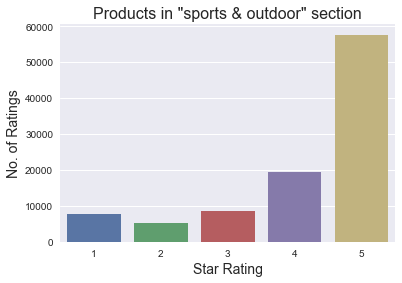

In [140]:
rating_count = sns.countplot(x= 'rating', data = df)
rating_count.set_xlabel('Star Rating', size = 14)
rating_count.set_ylabel('No. of Ratings', size = 14)
rating_count.set_title('Products in "sports & outdoor" section', size = 16)
#rating_count.set_xticklabels([1,2,3,4,5],size = 12)
#rating_count.set_yticklabels([1,2,3,4,5],size = 12)

The plot above suggests that, overall, customers are happy with the products in Amazon's "Sports & Outdoor" section.

### As expected, most of the time people don't bother to tell if the reviews were helpful or not. Most of the customers leave the filed blank!

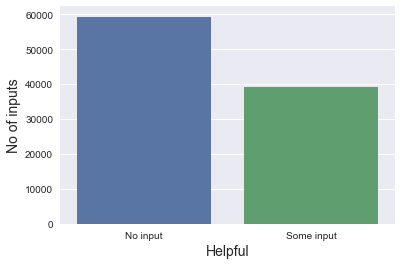

In [153]:
rating_count = sns.countplot(x= 'help', data = df)
rating_count.set_xticklabels(['No input', 'Some input'])
rating_count.set_xlabel('Helpful', size = 14)
rating_count.set_ylabel('No of inputs', size = 14)

### Creating another dataframe `rating` to group the data with `asin` and getting mean of rating.

In [13]:
rating = pd.DataFrame(df.groupby('asin')['rating'].mean())

Let's add a new column n_ratings

In [14]:
rating['n_ratings'] = pd.DataFrame(df.groupby('asin')['rating'].count())
rating.head()

,rating,n_ratings
asin,,
0000032034,3.666667,3
0965042138,4.333333,21
0970704615,1.000000,1
1300966947,5.000000,6
1553602110,5.000000,2


Plotting two histograms side-by-side, one for No. of ratings for the asin, n_ratings column, and the other for average rating which is rating column in the dataframe!<br>

We can creates two subplots and unpacks the output array immediately!

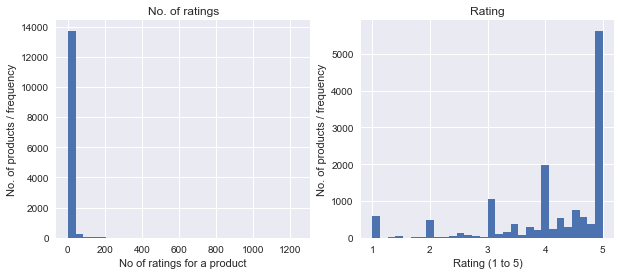

In [15]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# For no. of ratings 
ax1.set_title('No. of ratings')
ax1.hist(rating['n_ratings'], bins =30);
ax1.set_xlabel('No of ratings for a product')
ax1.set_ylabel('No. of products / frequency')


# For rating
ax2.set_title('Rating')
ax2.hist(rating['rating'], bins =30);
ax2.set_xlabel('Rating (1 to 5)')
ax2.set_ylabel('No. of products / frequency')

On the left, looks like most of the products have 0 or 1 number of ratings! <br>

On the right,"Rating is actually the mean rating", we see peaks at the whole numbers {1,2,3,4,5}. Usual act, most of the time people rate the things with the whole numbers. <br>

There are some products with average 5 star rating, they might be outstanding or may got only few ratings. <br>
We can also point out some products with really bad rating. However, most of the products got average rating between 3 and 4.<br>

Let's check the relationship between rating and no. of rating with a seaborn jointplot().<br>
As, we have rating and review of each product, so n_ratings is actually directly related to the sale of the certain product.

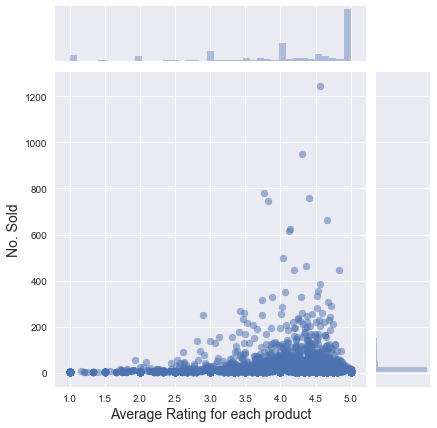

In [119]:
joint_plot = sns.jointplot(x='rating',y='n_ratings',data=rating, alpha=0.5) 

# JointGrid has a convenience function
joint_plot.set_axis_labels('Average Rating for each product', 'No. Sold', fontsize=14)
# Dont't want pearsonr and p value on the plot
joint_plot.ax_joint.legend_.remove()
#plt.tight_layout()

The joint plot looks ok!<br>
More the number of rating a product will have, more average rating it gets.
Good the product is, more people will buy it and the product will get more number of ratings / reviews. This is a normal act.<br>
Another thing, 1 or 2 stars have fewer number of ratings.

** Any relation between ratings and length of the review? Let's plot from the original dataframe.**

In [120]:
df.columns

Index(['asin', 'categories', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'title', 'unixReviewTime', 'rating', 'help',
       'rev_len', 'reviewerID_code', 'asin_code'],
      dtype='object')

In [154]:
#plt.scatter(df['rating'], df['rev_len'])

The plot above does not make much sense, need to normalize the data. Let's check how many star ratings exist in total. Need to groupby on ratings and mean for rev_len.<br>
Remember, this is more related to user behaviour while rate the product. This is independent of the product!

In [122]:
rating_rev_relation = df.groupby('rating')['rev_len'].mean()

In [123]:
#df.groupby('rating')['asin'].count()

In [124]:
rating_rev_relation = pd.DataFrame(rating_rev_relation)

In [125]:
rating_rev_relation['Avg_Rev_Lenght']= rating_rev_relation['rev_len']
rating_rev_relation.drop('rev_len', axis = 1, inplace =True)

In [126]:
rating_rev_relation['rating_count'] = df.groupby('rating')['asin'].count()

To normalize, we need count on each rating and them divide the rev_len by that count. Let see the relationship looks like. 

In [127]:
rating_rev_relation.head()

,Avg_Rev_Lenght,rating_count
rating,,
1,371.372508,7624
2,396.302073,5257
3,401.459057,8524
4,397.707668,19536
5,322.482866,57604


### Plot review count against (above dataframe) start rating, looks like people giving higher star are happy to put some text in for review!

In [128]:
#rating_rev_relation['normalize'] = rating_rev_relation['Avg_Rev_Lenght']/rating_rev_relation['rating_count']

In [129]:
#rating_rev_relation.head()

(300, 420)

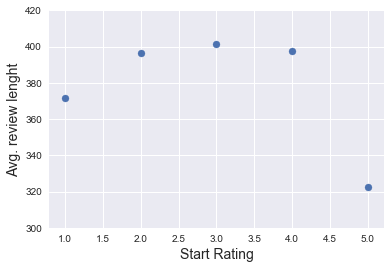

In [133]:
plt.scatter(rating_rev_relation.index, rating_rev_relation.Avg_Rev_Lenght)
plt.xlabel('Start Rating', size = 14)
plt.ylabel('Avg. review lenght', size = 14)
plt.ylim(300, 420)

From the above plot, we see that when people are happy about the product, they usually leave smaller length comments.  <br>
Initially, I was thinking that people usually leave longer reviews with higher star rating, which is not what I found.<br>
### Let's try to see if we can train our Machine Learning model to predict the star rating from reviews.